# Disease Prediction Using Machine Learning
### Dataset Used - https://www.kaggle.com/datasets/kaushil268/disease-prediction-using-machine-learning

## Import Dataset

In [199]:
import pandas as pd
import numpy as np
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Create database and table

In [2]:
# Creating database and table in that database

conn = sqlite3.connect('disease.db')

conn.execute('DROP TABLE DISEASE_PROGNOSIS')
conn.execute('''CREATE TABLE DISEASE_PROGNOSIS (
                ID          INT PRIMARY KEY     NOT NULL,
                PROGNOSIS   TEXT NOT NULL);''')
conn.close()

### 2. Import data from csv

In [3]:
# Inserting data into database table

disease_test_df = pd.read_csv('Disease_Testing.csv')
disease_train_df = pd.read_csv('Disease_Training.csv')

disease_df = pd.concat([disease_test_df, disease_train_df], ignore_index=True)

len(disease_df), len(disease_test_df), len(disease_train_df)

(4962, 42, 4920)

In [4]:
disease_df.sample(5)

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
1804,1863,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Cervical spondylosis
4773,4832,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
1310,1369,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4160,4219,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
3319,3378,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Urinary tract infection


### 3. Insert data in table from DataFrame

In [5]:
# Inserting data into table

conn = sqlite3.connect('disease.db')

conn.execute('DELETE FROM DISEASE_PROGNOSIS')
disease_df[['id', 'prognosis']].to_sql('DISEASE_PROGNOSIS', conn, if_exists = 'append', index=False)

conn.commit()

# Get total record count of table
c1 = conn.execute('SELECT COUNT(*) FROM DISEASE_PROGNOSIS')
print(c1.fetchall())

# Get records with Id < 110
c2 = conn.execute('SELECT * FROM DISEASE_PROGNOSIS WHERE ID < 110')
print(c2.fetchall())

conn.close()

[(4962,)]
[(101, 'Fungal infection'), (102, 'Fungal infection'), (103, 'Fungal infection'), (104, 'Fungal infection'), (105, 'Fungal infection'), (106, 'Fungal infection'), (107, 'Fungal infection'), (108, 'Fungal infection'), (109, 'Fungal infection')]


### 4. Import data from database and create final DF

In [6]:
# Import data from SQLite table
conn = sqlite3.connect('disease.db')
prognosis = conn.execute('SELECT * FROM DISEASE_PROGNOSIS').fetchall()
conn.close()

# convert result into data frame
prognosis_df = pd.DataFrame(prognosis, columns = ['id', 'prognosis'])
prognosis_df.head()

,id,prognosis
0,6001,Fungal infection
1,6002,Allergy
2,6003,GERD
3,6004,Chronic cholestasis
4,6005,Drug Reaction


In [7]:
# Remove "prognosis" column from original data
disease_df_prog = disease_df.drop(['prognosis'], axis = 1)

# merge prognosis data frame into the main data frame using matching column ("id")
merged_data = pd.merge(disease_df_prog, prognosis_df)
merged_data.head()

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,6001,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,6002,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,6003,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,6004,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,6005,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [8]:
# compare the original and merged data frame
disease_df.compare(merged_data, align_axis = 0)

,


## Preparing Dataset

### 1. Cleaning Data

In [9]:
# check for missing values
missing_data = disease_df.isna().sum()
missing_data[missing_data > 0]

# There is no missing data

Series([], dtype: int64)

In [10]:
# Check for duplicate records in data
disease_df[disease_df.duplicated()]

# There is no duplicate data in DF

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis


In [11]:
disease_df.describe()

,id,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
count,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,...,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000,4962.000000
mean,2589.795042,0.138049,0.160016,0.021967,0.045143,0.021967,0.162233,0.139057,0.045143,0.045143,...,0.021967,0.021967,0.021967,0.023378,0.023176,0.023176,0.023176,0.023176,0.023378,0.023176
std,1449.511053,0.344986,0.366658,0.146590,0.207639,0.146590,0.368702,0.346041,0.207639,0.207639,...,0.146590,0.146590,0.146590,0.151115,0.150478,0.150478,0.150478,0.150478,0.151115,0.150478
min,101.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1341.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2581.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3821.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6042.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


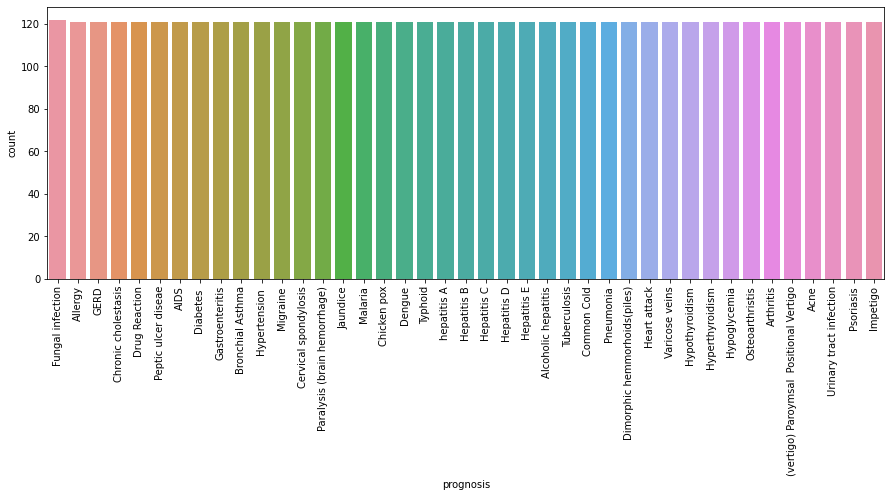

In [12]:
# Check the distribution of target values in data
#disease_df['prognosis'].value_counts()

fig, ax = plt.subplots(figsize = (15, 5))
sns.countplot(disease_df['prognosis'])
plt.xticks(rotation=90)
plt.show()

### 2. Prepare training and test sets

In [13]:
# Check values for target feature
disease_df['prognosis'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes ',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension ', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [14]:
# Convert categorical values to numeric
disease_df['prognosis'] = disease_df['prognosis'].astype('category')
disease_df['prognosis_num'] = disease_df['prognosis'].cat.codes
disease_df[['prognosis','prognosis_num']].head()

,prognosis,prognosis_num
0,Fungal infection,15
1,Allergy,4
2,GERD,16
3,Chronic cholestasis,9
4,Drug Reaction,14


In [15]:
# Check Unique values
disease_df[['prognosis_num','prognosis']].groupby(['prognosis_num','prognosis']).groups.keys()

dict_keys([(0, '(vertigo) Paroymsal  Positional Vertigo'), (1, 'AIDS'), (2, 'Acne'), (3, 'Alcoholic hepatitis'), (4, 'Allergy'), (5, 'Arthritis'), (6, 'Bronchial Asthma'), (7, 'Cervical spondylosis'), (8, 'Chicken pox'), (9, 'Chronic cholestasis'), (10, 'Common Cold'), (11, 'Dengue'), (12, 'Diabetes '), (13, 'Dimorphic hemmorhoids(piles)'), (14, 'Drug Reaction'), (15, 'Fungal infection'), (16, 'GERD'), (17, 'Gastroenteritis'), (18, 'Heart attack'), (19, 'Hepatitis B'), (20, 'Hepatitis C'), (21, 'Hepatitis D'), (22, 'Hepatitis E'), (23, 'Hypertension '), (24, 'Hyperthyroidism'), (25, 'Hypoglycemia'), (26, 'Hypothyroidism'), (27, 'Impetigo'), (28, 'Jaundice'), (29, 'Malaria'), (30, 'Migraine'), (31, 'Osteoarthristis'), (32, 'Paralysis (brain hemorrhage)'), (33, 'Peptic ulcer diseae'), (34, 'Pneumonia'), (35, 'Psoriasis'), (36, 'Tuberculosis'), (37, 'Typhoid'), (38, 'Urinary tract infection'), (39, 'Varicose veins'), (40, 'hepatitis A')])

In [16]:
disease_df[disease_df['prognosis_num'] == 1]['prognosis'].unique()

['AIDS']
Categories (41, object): ['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne', 'Alcoholic hepatitis', ..., 'Typhoid', 'Urinary tract infection', 'Varicose veins', 'hepatitis A']

In [17]:
# Use OneHotEncoding for categorical column
#disease_df_new = disease_df.drop('prognosis', axis=1)
#encoder = OneHotEncoder()
#disease_df_enc = pd.DataFrame(encoder.fit_transform(disease_df_new[['prognosis_num']]).toarray())
#disease_df_new.head()

# combining encoded DF with original DF
#encoded_df = disease_df_new.join(disease_df_enc)
#encoded_df.head()

In [18]:
# prepare features and target
X = disease_df.drop(['prognosis', 'prognosis_num'], axis=1)
y = disease_df['prognosis_num']

# Split training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

X_train.shape , X_test.shape

((3969, 133), (993, 133))

## Build ML Model

### 1. Logictic Regression

In [252]:
models_stats = []

# Create a function to build ML model

def build_model(classifier_name, model, x_train, y_train, x_test, y_test):
    model.fit(x_train, y_train)
    #print('Training Score: ', model.score(x_train, y_train))
    
    # predict for test set
    pred = model.predict(x_test)
    
    acc_score = accuracy_score(y_test, pred)
    prec_score = precision_score(y_test, pred, average='weighted')
    recal_score = recall_score(y_test, pred, average='weighted')
    f_1_score = f1_score(y_test, pred, average='weighted')
    
    models_stats.append([classifier_name, acc_score, prec_score, recal_score, f_1_score])
    
    print('Accuracy  : ', acc_score)
    print('Precision : ', prec_score)
    print('Recall    : ', recal_score)
    print('F1-score  : ', f_1_score)
    
    return pred

In [253]:
# call function to build logistic regression model
lr = LogisticRegression()

y_pred = build_model('Logistic Regression', lr, X_train, y_train, X_test, y_test)

Accuracy  :  0.9959718026183283
Precision :  0.9963897280966767
Recall    :  0.9959718026183283
F1-score  :  0.9959216556713321


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [254]:
models_stats

[['Logistic Regression',
  0.9959718026183283,
  0.9963897280966767,
  0.9959718026183283,
  0.9959216556713321]]

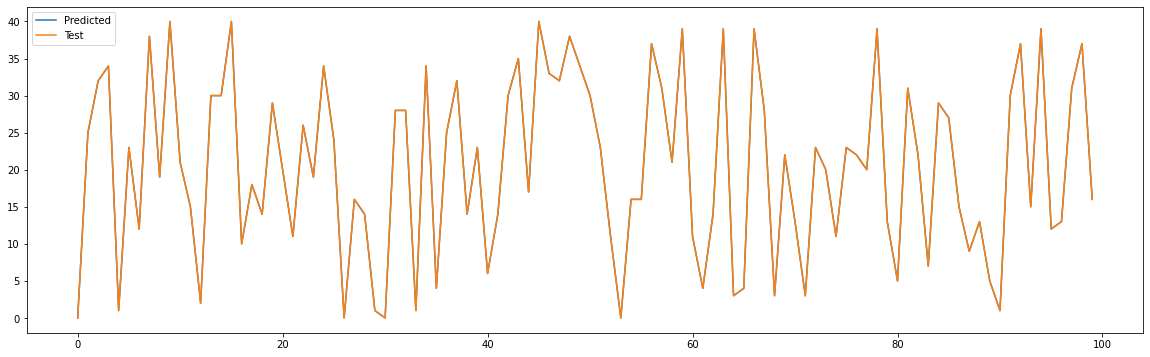

In [234]:
# plot predicted and test values to see deviation
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(y_pred[:100], label = 'Predicted')
ax.plot(y_test.values[:100], label = 'Test')
plt.legend()

plt.show()

In [93]:
y_pred[:10]

array([ 0, 25, 32, 34,  1, 23, 12, 38, 19, 40], dtype=int8)

### 2. Hyperparameter Tuning for KNN Classifier

In [235]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


def apply_hyperparameter_tuning(classifier_name, model, parameters, x_train, y_train, cv=3):
    grid_search = GridSearchCV(model, parameters, cv=cv, return_train_score=True, scoring='accuracy' )
    grid_search.fit(x_train, y_train)
    
    print(f'Best parameters: {grid_search.best_params_}', '\n')
    
    # print model performance with different combinations of parameters
    print('Model Performance for parameters')
    print('*'*32, '\n')
    for i in range(np.prod([len(parameters[j]) for j in parameters.keys()])):
        print('Parameters: ', grid_search.cv_results_['params'][i])
        print('Mean Train Score: ', grid_search.cv_results_['mean_train_score'][i])
        print('Mean Test Score: ', grid_search.cv_results_['mean_test_score'][i])
        print('Rank: ', grid_search.cv_results_['rank_test_score'][i])
        print('-'*36)
    
    no_of_params = len(parameters.keys())
    
    if no_of_params > 1:
        x_list = range(np.prod([len(parameters[j]) for j in parameters.keys()]))
    else:
        if classifier_name == "Random Forest":
            x_list = parameters['max_depth']
        elif classifier_name == 'K-Nearest Neighbors':
            x_list = parameters['n_neighbors']
        else:
            x_list = None
    
    # plot the scores corresponding to no of neighbors
    if x_list != None:
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.plot(x_list, grid_search.cv_results_['mean_test_score'] , marker='o')
        ax.set_title(f"Grid Search Accuracy Scores for {classifier_name} Classifier", fontsize=14)
        
        if no_of_params > 1:
            ax.set_xlabel('Parameters Combinations', fontsize=12)
        else:
            if classifier_name == "Random Forest":
                ax.set_xlabel('Max_depth', fontsize=12)
            else:
                ax.set_xlabel('N_neighbors', fontsize=12)
        
        ax.set_ylabel('Mean Test Score', fontsize=12)
        plt.show()
    
    return grid_search


Best parameters: {'n_neighbors': 1} 

Model Performance for parameters
******************************** 

Parameters:  {'n_neighbors': 1}
Mean Train Score:  1.0
Mean Test Score:  0.4827412446460066
Rank:  1
------------------------------------
Parameters:  {'n_neighbors': 5}
Mean Train Score:  0.5787351977828168
Mean Test Score:  0.4336104812295289
Rank:  2
------------------------------------
Parameters:  {'n_neighbors': 10}
Mean Train Score:  0.4541446208112874
Mean Test Score:  0.31519274376417233
Rank:  3
------------------------------------
Parameters:  {'n_neighbors': 15}
Mean Train Score:  0.31292517006802717
Mean Test Score:  0.18165784832451495
Rank:  4
------------------------------------
Parameters:  {'n_neighbors': 20}
Mean Train Score:  0.22776518014613253
Mean Test Score:  0.12144116906021668
Rank:  5
------------------------------------


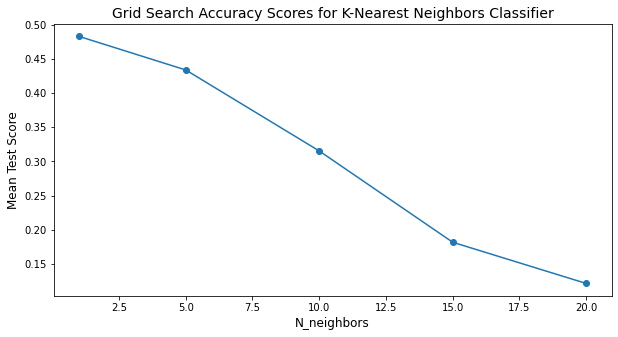

In [236]:
# hyperparameter tuning for KNN classifier

parameters = {'n_neighbors' : [1, 5, 10, 15, 20]}
knn = KNeighborsClassifier()

gs_knn = apply_hyperparameter_tuning('K-Nearest Neighbors', knn, parameters, X_train, y_train)

In [256]:
# create Random Forest model with best parameters
knn_model = gs_knn.best_estimator_
y_pred_knn = build_model('K-Nearest Neighbors', knn_model, X_train, y_train, X_test, y_test)

Accuracy  :  0.4904330312185297
Precision :  0.5728747306405335
Recall    :  0.4904330312185297
F1-score  :  0.5063552056720554


In [184]:
## KNN classifier does not seem suitable for this problem

### 3. Hyperparameter Tuning for Random Forest Classifier

Best parameters: {'criterion': 'gini', 'max_depth': 15} 

Model Performance for parameters
******************************** 

Parameters:  {'criterion': 'gini', 'max_depth': 2}
Mean Train Score:  0.8211136306374401
Mean Test Score:  0.8196019148400101
Rank:  8
------------------------------------
Parameters:  {'criterion': 'gini', 'max_depth': 5}
Mean Train Score:  0.9638447971781305
Mean Test Score:  0.9632149155958679
Rank:  6
------------------------------------
Parameters:  {'criterion': 'gini', 'max_depth': 10}
Mean Train Score:  0.999244142101285
Mean Test Score:  0.9977324263038548
Rank:  4
------------------------------------
Parameters:  {'criterion': 'gini', 'max_depth': 15}
Mean Train Score:  1.0
Mean Test Score:  1.0
Rank:  1
------------------------------------
Parameters:  {'criterion': 'entropy', 'max_depth': 2}
Mean Train Score:  0.8998488284202569
Mean Test Score:  0.8964474678760394
Rank:  7
------------------------------------
Parameters:  {'criterion': 'entropy', 'm

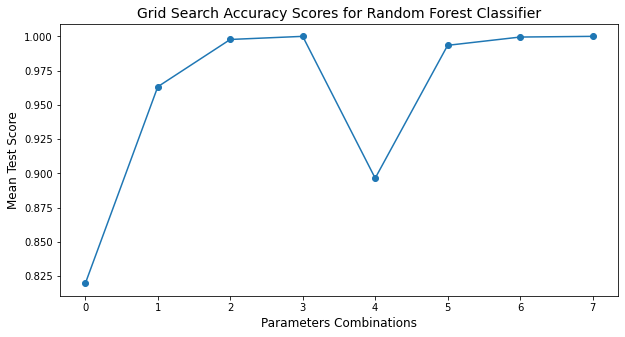

In [239]:
from sklearn.ensemble import RandomForestClassifier

# hyperparameter tuning for KNN classifier

rf = RandomForestClassifier()
param_grid = {'criterion' : ['gini', 'entropy'],
              'max_depth' : [2, 5, 10, 15]}

gs_rf = apply_hyperparameter_tuning('Random Forest', rf, param_grid, X_train, y_train)

In [257]:
# create Random Forest model with best parameters
rf_model = gs_rf.best_estimator_
y_pred_rf = build_model('Random Forest', rf_model, X_train, y_train, X_test, y_test)

Accuracy  :  0.998992950654582
Precision :  0.9990409053853162
Recall    :  0.998992950654582
F1-score  :  0.9989981398473616


### 4. Models Evaluation

In [260]:
models_eval = pd.DataFrame(models_stats, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

models_eval

,Model,Accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.995972,0.996390,0.995972,0.995922
1,K-Nearest Neighbors,0.490433,0.572875,0.490433,0.506355
2,Random Forest,0.998993,0.999041,0.998993,0.998998


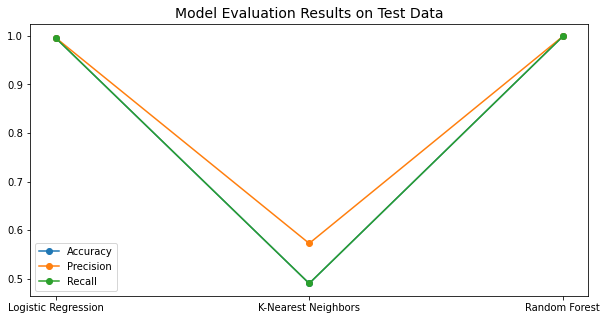

In [270]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(models_eval['Model'], models_eval['Accuracy'] , marker='o', label = 'Accuracy')
ax.plot(models_eval['Model'], models_eval['Precision'] , marker='o', label = 'Precision')
ax.plot(models_eval['Model'], models_eval['Recall'] , marker='o', label = 'Recall')

ax.set_title('Model Evaluation Results on Test Data', fontsize=14)
ax.legend()

plt.show()

In [198]:
# check for feature importances
rf_model.feature_importances_[rf_model.feature_importances_ > 0.011]

array([0.01477551, 0.01381668, 0.0171705 , 0.01113844, 0.01841004,
       0.0122302 , 0.01175551, 0.01437525, 0.01390441, 0.01210742,
       0.01159602, 0.01689349, 0.01172723, 0.01841116, 0.01750186,
       0.01778624, 0.0166947 , 0.01310442, 0.01551845, 0.01411214,
       0.01166763, 0.0140483 , 0.0127335 , 0.01614866])

In [271]:
pd.concat([pd.Series(X_train.columns[rf_model.feature_importances_ >= 0.011]),
           pd.Series(rf_model.feature_importances_[rf_model.feature_importances_ >= 0.011]) ],
           axis = 1, names = ['Feature', 'Importance'])

,0,1
0,weight_loss,0.013498
1,sunken_eyes,0.015543
2,dehydration,0.011568
3,pain_behind_the_eyes,0.019291
4,mild_fever,0.018527
5,fast_heart_rate,0.013744
6,muscle_weakness,0.013777
7,movement_stiffness,0.012638
8,muscle_pain,0.018951
9,altered_sensorium,0.013783
